In [4]:
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override()
import pandas as pd
import numpy as np
import random 

import math

In [5]:
today = date.today()
ticker = 'SPY'
start_date = '2019-01-02'
end = today
df = pdr.get_data_yahoo(ticker, start=start_date, end=today)

[*********************100%***********************]  1 of 1 completed


In [6]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,245.979996,251.210007,245.949997,250.179993,237.858902,126925200
2019-01-03,248.229996,248.570007,243.669998,244.210007,232.182892,144140700
2019-01-04,247.589996,253.110001,247.169998,252.389999,239.960052,142628800
2019-01-07,252.690002,255.949997,251.690002,254.380005,241.852005,103139100
2019-01-08,256.820007,257.309998,254.000000,256.769989,244.124298,102512600
...,...,...,...,...,...,...
2022-01-10,462.700012,465.739990,456.600006,465.510010,465.510010,119362000
2022-01-11,465.230011,469.850006,462.049988,469.750000,469.750000,74303100
2022-01-12,471.589996,473.200012,468.940002,471.019989,471.019989,67605400


In [25]:
r = random.randint(-df.shape[0], -201) #get an integer N: -df.shape[0]<= N <= -201
aclose = np.array(df.Close[r:r+201]) #select 201 close from a random position


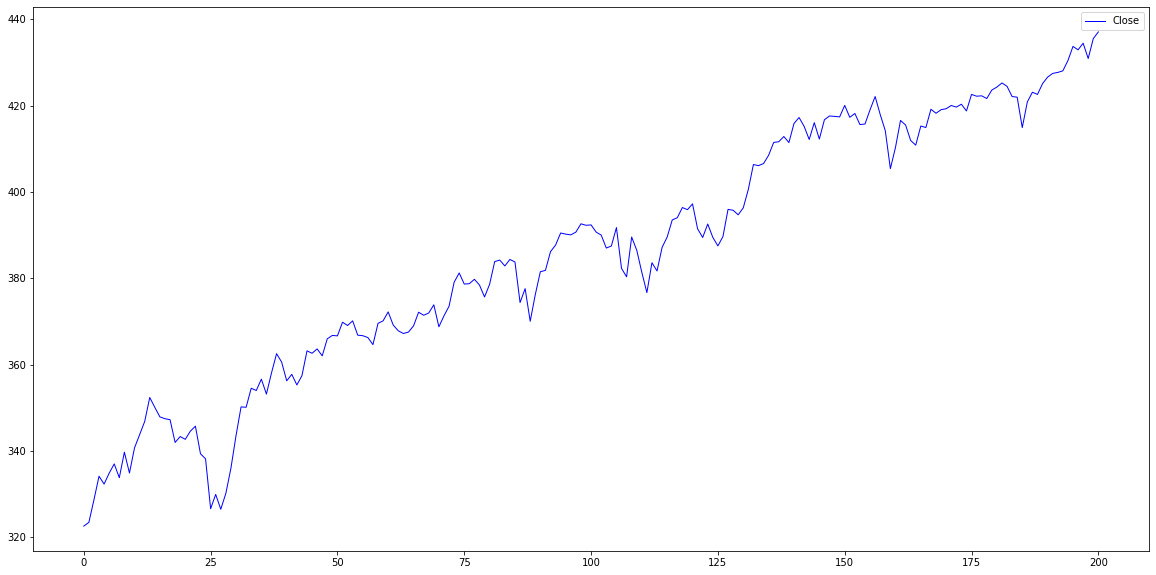

In [26]:
import matplotlib.pyplot as plt
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

X = [x for x in range(0,aclose.shape[0])]
y = aclose
plt.plot(X,y, linewidth=1, color='b', label='Close')
plt.legend()
plt.show();

In [27]:
# vr rows is a population of monkeys, columns are bets
# 0 no bet, 1 open, 2 close all the previous open positions
vr = np.random.randint(3, size=(80, 40))
vr

array([[2, 1, 2, ..., 0, 2, 2],
       [0, 1, 1, ..., 2, 2, 1],
       [2, 1, 0, ..., 2, 0, 2],
       ...,
       [1, 1, 2, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 0, 0],
       [1, 2, 0, ..., 2, 0, 0]])

In [35]:
def calcFitness(v, j):
    balance = 0.0
    total = 0.0
    buy = False
    vc = np.empty([0]) 
    i=0
    while i<vr.shape[1]:
        if v[i]==1:
            vc = np.concatenate( (vc,[aclose[j+i]]) )
            buy = True
        if v[i]==2 and buy:
            balance = aclose[j+i] - vc
            total = total + sum(balance)
            buy = False
            vc = np.empty([0])
        i = i+1
    if buy:
        balance = aclose[j+i] - vc
        total = total + sum(balance)
        buy = False
    return total


vtot = np.empty([0,vr.shape[0]])
#bot bets 40 times for each z
#vfit get total of each set of bets
#vtot has 100 rows of 80 totals of bets
for z in range(100):
    vfit = [(calcFitness(e, z),e) for e in vr]
    vtot = np.concatenate( (vtot,[[a for (a,b) in vfit]]) )
vtot


array([[-25.8699646 , -48.50997925, -36.40002441, ...,  54.6000061 ,
         73.01000977,   8.09002686],
       [  6.67001343,  -9.23999023,   3.39007568, ...,  49.        ,
         15.33999634,  22.38000488],
       [ 21.00991821, -24.87994385,  11.61993408, ...,   1.4598999 ,
         25.30001831,   2.69998169],
       ...,
       [-10.24008179,  -9.53997803,  -7.74005127, ...,  46.6100769 ,
         38.90005493,  11.5       ],
       [-28.92004395,  21.45993042, -11.14004517, ...,  26.25003052,
         27.58990479,  12.58996582],
       [ -9.63995361,  32.14996338, -14.1499939 , ..., -27.88989258,
         49.65994263,   6.69006348]])

In [36]:
#show 80 totals, final profit
np.sum(vtot, axis=0), np.sum(vtot)

(array([1202.71987915, 1834.52987671, 1536.63983154, 2962.15982056,
        2233.76989746, 2233.08978271, 3725.72973633, 1440.72976685,
        1680.37997437, 1724.98986816, 3255.04937744, 3694.2796936 ,
        1676.20983887, 2556.51992798, 1418.42984009, 1499.48986816,
        1898.52981567, 2574.43981934, 1229.13986206, 1433.62008667,
        2287.42984009,  878.96990967, 2361.95986938, 1023.10995483,
        1331.23986816,  943.39990234, 3884.10968018, 1531.38998413,
        2818.51971436, 1284.74996948, 3200.62002563, 1176.1499939 ,
        1737.01983643, 2390.7696228 , 1147.84997559, 1547.46005249,
        1591.88986206, 1310.85992432,  984.3399353 , 1654.12994385,
        4091.36968994, 1365.44998169, 1054.21990967, 2266.79977417,
        2010.47970581, 2111.87985229,  894.82998657, 2610.72979736,
        2151.60983276, 1467.30987549, 2607.97982788, 2255.97988892,
        1377.07980347, 1187.34979248, 1639.30987549, 1753.08981323,
        1713.49972534, 1156.8999939 , 1169.07992

In [41]:
profit = "${:,.2f}". format( np.sum(vtot) )
print('profit'profit)


$152,599.79
